In [1]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [2]:
import os
from PIL import Image
from collections import defaultdict

voc_path = 'VOCDevkit/VOC2007'
img_dir = os.path.join(voc_path, 'JPEGImages')
ann_dir = os.path.join(voc_path, 'Annotations')

img_files = [os.path.splitext(f)[0] for f in os.listdir(img_dir) if f.endswith('.jpg')]
ann_files = [os.path.splitext(f)[0] for f in os.listdir(ann_dir) if f.endswith('.xml')]

img_set = set(img_files)
ann_set = set(ann_files)

print(f"Số lượng ảnh     : {len(img_set)}")
print(f"Số lượng nhãn    : {len(ann_set)}")



Số lượng ảnh     : 14482
Số lượng nhãn    : 14482


<>:7: SyntaxWarning: invalid escape sequence '\y'
<>:9: SyntaxWarning: invalid escape sequence '\y'
<>:7: SyntaxWarning: invalid escape sequence '\y'
<>:9: SyntaxWarning: invalid escape sequence '\y'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15324\2385115458.py:7: SyntaxWarning: invalid escape sequence '\y'
  xml_path = 'D:\yolo8_congTruong\VOCdevkit\VOC2007\Annotations\hd46.xml'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15324\2385115458.py:9: SyntaxWarning: invalid escape sequence '\y'
  image_path = 'D:\yolo8_congTruong\VOCdevkit\VOC2007\JPEGImages\hd46.jpg'


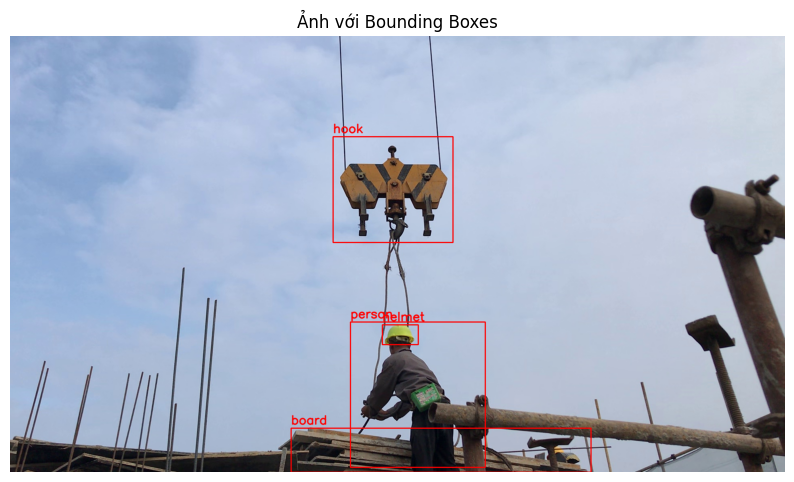

In [6]:
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os

# === Đường dẫn đến file XML và ảnh tương ứng ===
xml_path = 'D:\yolo8_congTruong\VOCdevkit\VOC2007\Annotations\hd46.xml'

image_path = 'D:\yolo8_congTruong\VOCdevkit\VOC2007\JPEGImages\hd46.jpg'
# === Đọc file XML ===
tree = ET.parse(xml_path)
root = tree.getroot()

# === Đọc ảnh ===
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Không tìm thấy ảnh tại: {image_path}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# === Vẽ các bounding boxes ===
for obj in root.findall('object'):
    label = obj.find('name').text
    bndbox = obj.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)

    # Vẽ hình chữ nhật và tên đối tượng
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                1, (255, 0, 0), 2, cv2.LINE_AA)

# === Hiển thị ảnh ===
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.title("Ảnh với Bounding Boxes")
plt.show()


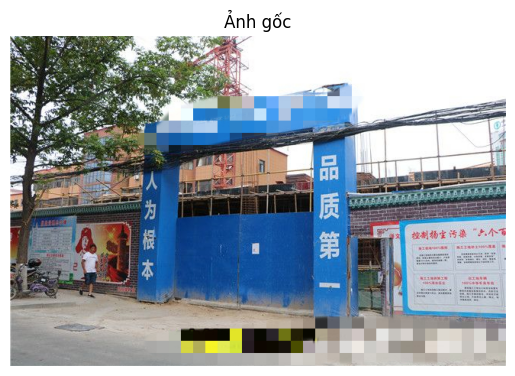

In [ ]:
import os
import cv2
from albumentations import HorizontalFlip, RandomBrightnessContrast, Compose
import matplotlib.pyplot as plt

img = cv2.imread('D:/yolo8_congTruong/VOCdevkit/VOC2007/JPEGImages/zl319.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Ảnh gốc")
plt.axis("off")
plt.show()

In [3]:
import os
import random
import shutil

helmet_dir = "D:/yolo8_congTruong/outputs/classification_dataset/train/helmet"
no_helmet_dir = "D:/yolo8_congTruong/outputs/classification_dataset/train/no_helmet"

# Lấy danh sách file
helmet_files = os.listdir(helmet_dir)
no_helmet_files = os.listdir(no_helmet_dir)

# Số lượng ảnh muốn giữ lại bằng số ảnh của class nhỏ hơn
keep_count = len(no_helmet_files)

# Xáo trộn và lấy file giữ lại
random.shuffle(helmet_files)
files_to_keep = helmet_files[:keep_count]
files_to_remove = helmet_files[keep_count:]

# Xóa file thừa
for f in files_to_remove:
    os.remove(os.path.join(helmet_dir, f))

print(f"Đã xóa {len(files_to_remove)} ảnh, còn lại {keep_count} ảnh trong 'helmet'")


Đã xóa 0 ảnh, còn lại 3696 ảnh trong 'helmet'


In [ ]:
import xml.etree.ElementTree as ET
from collections import Counter

ann_dir = 'VOCDevkit/VOC2007/Annotations'

all_classes = []

for filename in os.listdir(ann_dir):
    if not filename.endswith('.xml'):
        continue
    filepath = os.path.join(ann_dir, filename)
    tree = ET.parse(filepath)
    root = tree.getroot()

    for obj in root.findall("object"):
        class_name = obj.find("name").text.strip()
        all_classes.append(class_name)

class_counts = Counter(all_classes)

print("Danh sách các nhãn (classes) trong dataset:")
for i, (cls, count) in enumerate(class_counts.items()):
    print(f"{i}: {cls} — {count} mẫu")


Danh sách các nhãn (classes) trong dataset:
0: hook — 8389 mẫu
1: person — 70857 mẫu
2: helmet — 54619 mẫu
3: vest — 45866 mẫu
4: fence — 8395 mẫu
5: board — 12085 mẫu
6: slogan — 17930 mẫu
7: rebar — 6571 mẫu
8: handcart — 1217 mẫu
9: ebox — 8114 mẫu
10: hopper — 5155 mẫu
11: wood — 16964 mẫu
12: scaffold — 24798 mẫu
13: brick — 3452 mẫu
14: cutter — 1789 mẫu


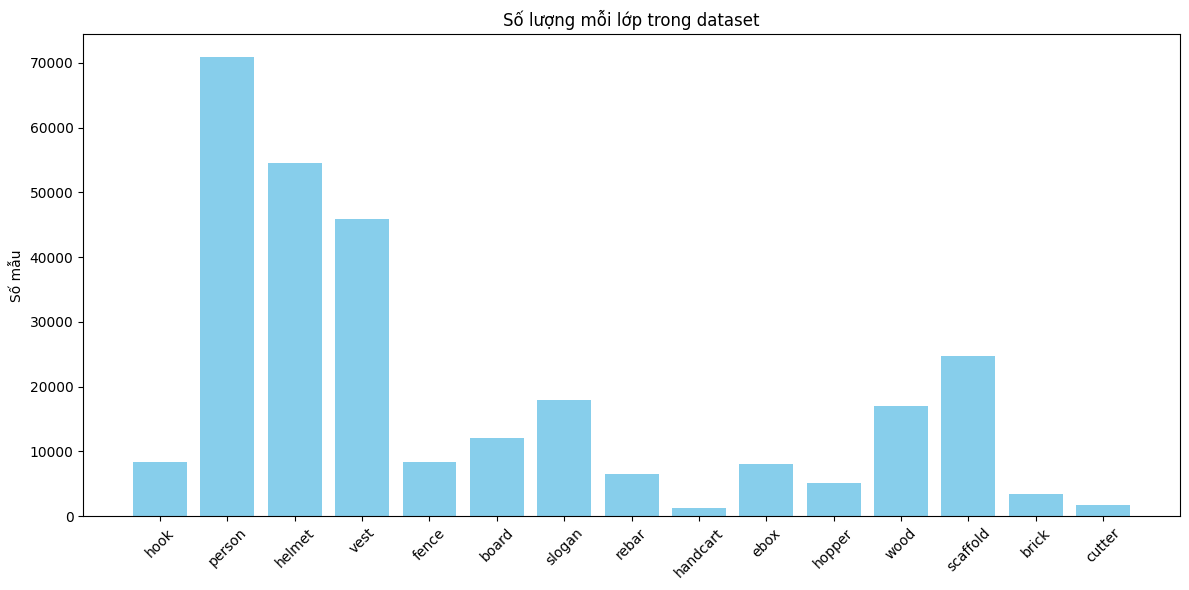

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=45)
plt.title("Số lượng mỗi lớp trong dataset")
plt.ylabel("Số mẫu")
plt.tight_layout()
plt.show()


In [ ]:
# chia train/val dataset
from sklearn.model_selection import train_test_split
import os
import shutil

ROOT_DIR = "D:/yolo8_congTruong/SODA"
IMAGES_PATH = os.path.join(ROOT_DIR, "images", "trainval")
LABELS_PATH = os.path.join(ROOT_DIR, "labels", "trainval")

labels = [f for f in os.listdir(LABELS_PATH) if f.endswith(".txt")]

train_labels, val_labels = train_test_split(labels, test_size=0.2, random_state=42)

for split in ['train', 'val']:
    os.makedirs(f"SODA/images/{split}", exist_ok=True)
    os.makedirs(f"SODA/labels/{split}", exist_ok=True)

def copy_files(label_files, split):
    for label_file in label_files:
        image_file = label_file.replace(".txt", ".jpg")  
        src_img = os.path.join(IMAGES_PATH, image_file)
        src_lbl = os.path.join(LABELS_PATH, label_file)

        dst_img = f"SODA/images/{split}/{image_file}"
        dst_lbl = f"SODA/labels/{split}/{label_file}"

        if os.path.exists(src_img):
            shutil.copy(src_img, dst_img)
            shutil.copy(src_lbl, dst_lbl)


copy_files(train_labels, "train")
copy_files(val_labels, "val")

print(f"Done! Train: {len(train_labels)}, Val: {len(val_labels)}")

Done! Train: 10408, Val: 2602


In [ ]:
import os
import xml.etree.ElementTree as ET

ann_dir = 'VOCDevkit/VOC2007/Annotations'
object_counts = []  
file_names = []    

for filename in os.listdir(ann_dir):
    if not filename.endswith('.xml'):
        continue
    filepath = os.path.join(ann_dir, filename)
    tree = ET.parse(filepath)
    root = tree.getroot()

    objects = root.findall('object')
    count = len(objects)
    object_counts.append(count)
    file_names.append((filename.replace('.xml', ''), count))

# Tính số object trung bình
counts_only = [count for _, count in file_names]
avg_count = sum(counts_only) / len(counts_only)
print(f"Số object trung bình mỗi ảnh: {avg_count:.2f}")

# Tìm ảnh có nhiều object nhất
max_obj = max(file_names, key=lambda x: x[1])
print(f"Ảnh có nhiều object nhất: {max_obj[0]} ({max_obj[1]} object)")

# Tìm ảnh không có object nào
no_objects = [name for name, count in file_names if count == 0]
if no_objects:
    print("Các ảnh không có object nào:")
    for name in no_objects:
        print(f"- {name}")
else:
    print("Không có ảnh nào không chứa object.")


Số object trung bình mỗi ảnh: 14.42
Ảnh có nhiều object nhất: hpdji1001 (217 object)
Các ảnh không có object nào:
- hpdr3709
- hpdr715
- hptm1130
- hptm1131
- hptm1132
- hptm1133
- hptm1136
- hptm1140
- hptm1226
- hptm1855
- hptm1856
- hptm1858
- hptm1865
- hptm2328
- hptm2329
- hptm2355
- hptm2358
- hptm2380
- hptm2387
- hptm2388
- hptm2391
- hptm3756
- hptm3767
- hptm3778
- hptm3800
- hptm4101
- hptm4112
- hptm4123
- hptm4134
- hptm4145
- hptm4279
- hptm4312
- hptm4323
- hptm4345
- hptm4585
- hptm4751
- hptm4806
- hptm4816
- hptm4820
- hptm4821
- hptm4822
- hptm7157
- hptm7158
- hptm7159
- sz195
- yf154
- yf159
- yf602
- yf603
- yf604
- yf605
- yf613
- yf614
- zl268


Chuyển từ VOC sang định dang YOLO

In [ ]:
import os
import xml.etree.ElementTree as ET


ann_dir = 'VOCDevkit/VOC2007/Annotations'
img_dir = 'VOCDevkit/VOC2007/JPEGImages'
out_dir = 'SODA/labels'
classes = ['person','helmet']
os.makedirs(out_dir,exist_ok=True)

def convert(size, box):
    dw, dh = 1./size[0], 1./size[1]
    x = (box[0] + box[2])/2.0
    y = (box[1] + box[3])/2.0
    w = box[2] - box[0]
    h = box[3] - box[1]
    return x * dw, y * dh, w * dw, h * dh

for file in os.listdir(ann_dir):
    if not file.endswith('.xml'): 
        continue
    in_file = open(os.path.join(ann_dir, file), 'r', encoding='utf-8')
    tree = ET.parse(in_file)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    out_file = open(os.path.join(out_dir, file.replace('.xml', '.txt')), 'w')
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in classes:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = [int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text),
             int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text)]
        bb = convert((w, h), b)
        out_file.write(f"{cls_id} " + " ".join([str(round(a, 6)) for a in bb]) + '\n')

    

xóa những ảnh không có person


In [ ]:
import os
import xml.etree.ElementTree as ET

ann_dir = 'VOCDevkit/VOC2007/Annotations'
img_dir = 'VOCDevkit/VOC2007/JPEGImages'
classes_to_keep = ['person']

# Duyệt qua tất cả file XML
for xml_file in os.listdir(ann_dir):
    if not xml_file.endswith('.xml'):
        continue

    xml_path = os.path.join(ann_dir, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    has_person = False
    for obj in root.findall('object'):
        name = obj.find('name').text
        if name in classes_to_keep:
            has_person = True
            break

    if not has_person:
        # Không có person -> xóa ảnh
        img_filename = xml_file.replace('.xml', '.jpg')
        img_path = os.path.join(img_dir, img_filename)
        if os.path.exists(img_path):
            os.remove(img_path)
            os.remove(xml_path)
            


In [ ]:
import shutil
import os

split = 'train' 
imgset_path = f'VOCDevkit/VOC2007/ImageSets/Main/{split}.txt'

with open(imgset_path) as f:
    lines = f.read().strip().splitlines()

for name in lines:
    img_src = f'VOCDevkit/VOC2007/JPEGImages/{name}.jpg'
    img_dst = f'SODA/images/{split}/{name}.jpg'
    
    label_src = f'SODA/labels/{name}.txt'
    label_dst = f'SODA/labels/{split}/{name}.txt'

    if not os.path.exists(img_src):
        continue
    if not os.path.exists(label_src):
        continue

    os.makedirs(os.path.dirname(img_dst), exist_ok=True)
    shutil.copy(img_src, img_dst)

    os.makedirs(os.path.dirname(label_dst), exist_ok=True)
    shutil.copy(label_src, label_dst)


In [ ]:
split = 'test' 
imgset_path = f'VOCDevkit/VOC2007/ImageSets/Main/{split}.txt'

with open(imgset_path) as f:
    lines = f.read().strip().splitlines()

for name in lines:
    img_src = f'VOCDevkit/VOC2007/JPEGImages/{name}.jpg'
    img_dst = f'SODA/images/{split}/{name}.jpg'

    label_src = f'SODA/labels/{name}.txt'
    label_dst = f'SODA/labels/{split}/{name}.txt'
    if not os.path.exists(img_src):
        continue
    if not os.path.exists(label_src):
        continue

    os.makedirs(os.path.dirname(img_dst), exist_ok=True)
    shutil.copy(img_src, img_dst)

    os.makedirs(os.path.dirname(label_dst), exist_ok=True)
    shutil.copy(label_src, label_dst)


Install Yolov8

In [6]:
from ultralytics import YOLO
model = YOLO('D:/yolo8_congTruong/model/best.pt')
results = model.predict(source='D:/yolo8_congTruong/SODA/images/test/hd120.jpg', conf=0.3, save=True)


image 1/1 D:\yolo8_congTruong\SODA\images\test\hd120.jpg: 384x640 3 persons, 3 helmets, 70.8ms
Speed: 9.7ms preprocess, 70.8ms inference, 28.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict


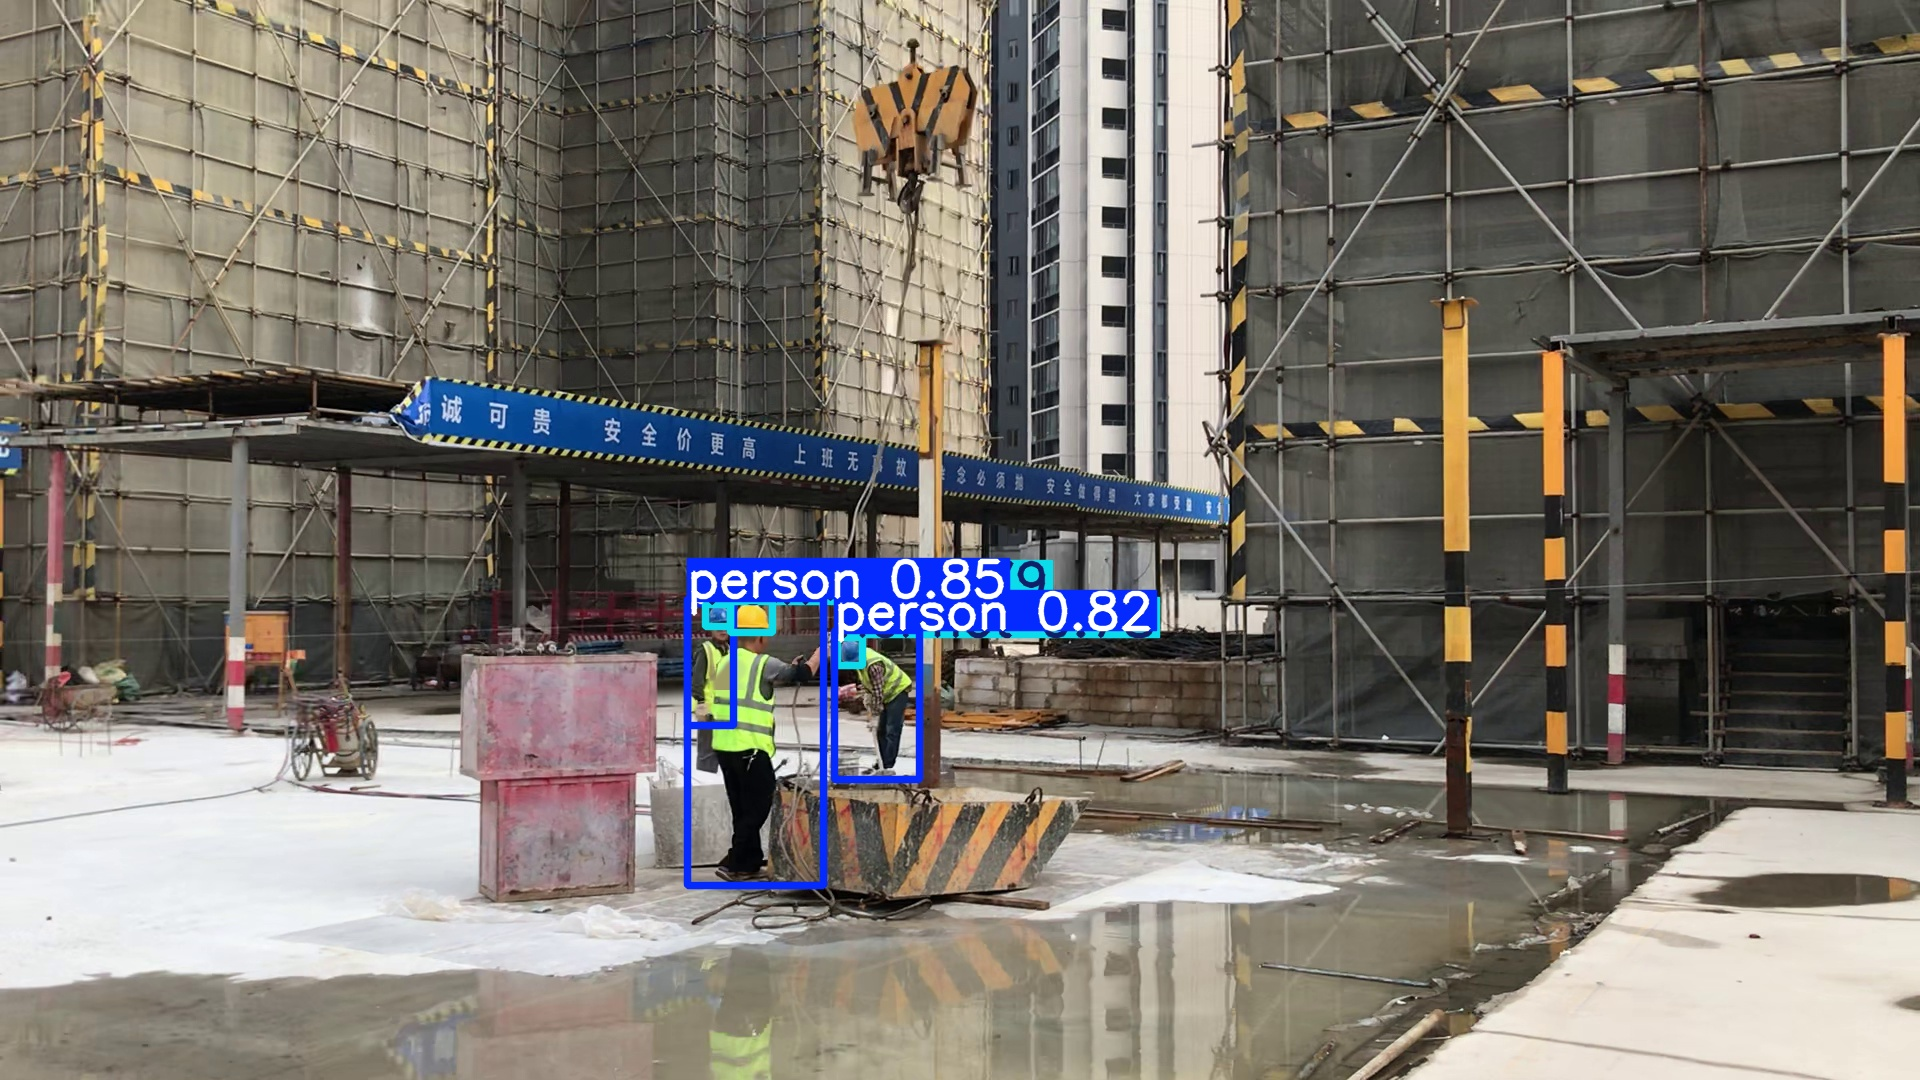

In [13]:
from IPython.display import Image
Image(filename='runs/detect/predict/hd120.jpg')

In [14]:
from ultralytics import YOLO
model = YOLO("D:/yolo8_congTruong/model/best.pt")
print(model.names)

{0: 'person', 1: 'helmet'}
